In [92]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

## Load the height file which is generated by a simple pcc algorithm in LabView during data taking

In [93]:
# just select the path
dir_path = "/data/SC_data/ImageData/HeightData/20210616/run/"
heightFromTxt=np.load(dir_path+"height_info.npy")
timeFromTxt=np.load(dir_path+"time_info.npy")



In [94]:
# pandas data frame (not really necessary here but doesn't hurt either)

df_new = pd.DataFrame()
df_new["Height"]=heightFromTxt
df_new["Time"]=(timeFromTxt-timeFromTxt[0])

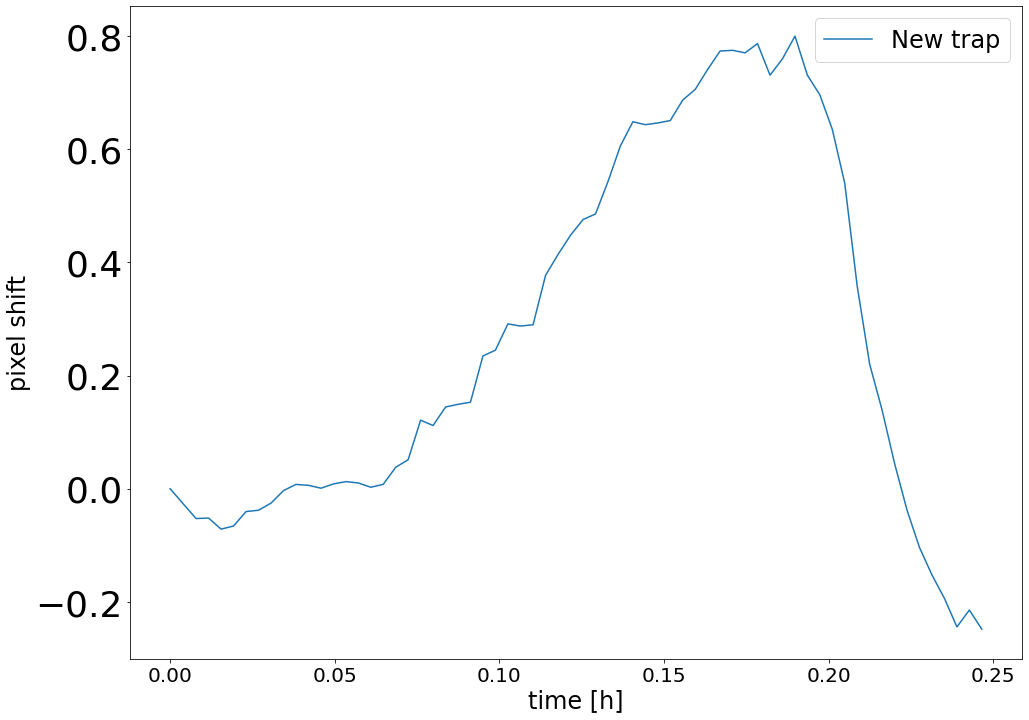

In [95]:
# plot
# span can be used to average the files
plt.plot(df_new.Time/3600,df_new.Height.ewm(span=10,adjust=True).mean(),label="New trap")
plt.ylabel("pixel shift")
plt.xlabel("time [h]")
plt.legend()
plt.show()

## In case the vanilla method does not work, do some manual work

In [35]:
# load the images
#dir_path = "/data/SC_data/ImageData/HeightData/20210616/run/i*npy"
dir_path = "/data/new_trap/Testdata/20210617/*npy"

test_images = load_npy_files(dir_path)

/data/new_trap/Testdata/20210617/height_info.npy 0
/data/new_trap/Testdata/20210617/time_info.npy 1
/data/new_trap/Testdata/20210617/image_test_0.npy 2
/data/new_trap/Testdata/20210617/image_test_1.npy 3
/data/new_trap/Testdata/20210617/image_test_2.npy 4
/data/new_trap/Testdata/20210617/image_test_3.npy 5
/data/new_trap/Testdata/20210617/image_test_4.npy 6


In [83]:
np.argmax(np.mean(test_images[2],axis=0))

1275

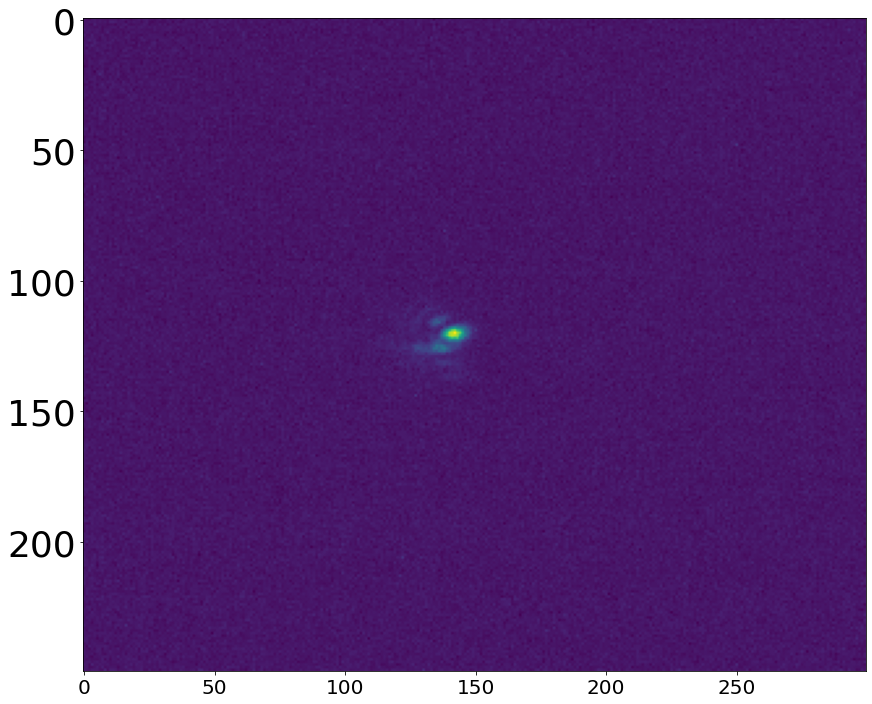

In [85]:
plt.imshow(test_images[2][250:500,500:800])

In [40]:
pcc(threshold_image(test_images[2],50,256),threshold_image(test_images[4],50,256),upsample_factor=100)

(array([-0.03,  0.13,  0.  ]), array([0.37492259]), 1.1578592899542918e-05)

In [23]:
shiftlist = [pcc(test_images[0],img,upsample_factor=100)[0] for img in tqdm(test_images)]

100%|██████████| 4456/4456 [14:40<00:00,  5.33it/s]


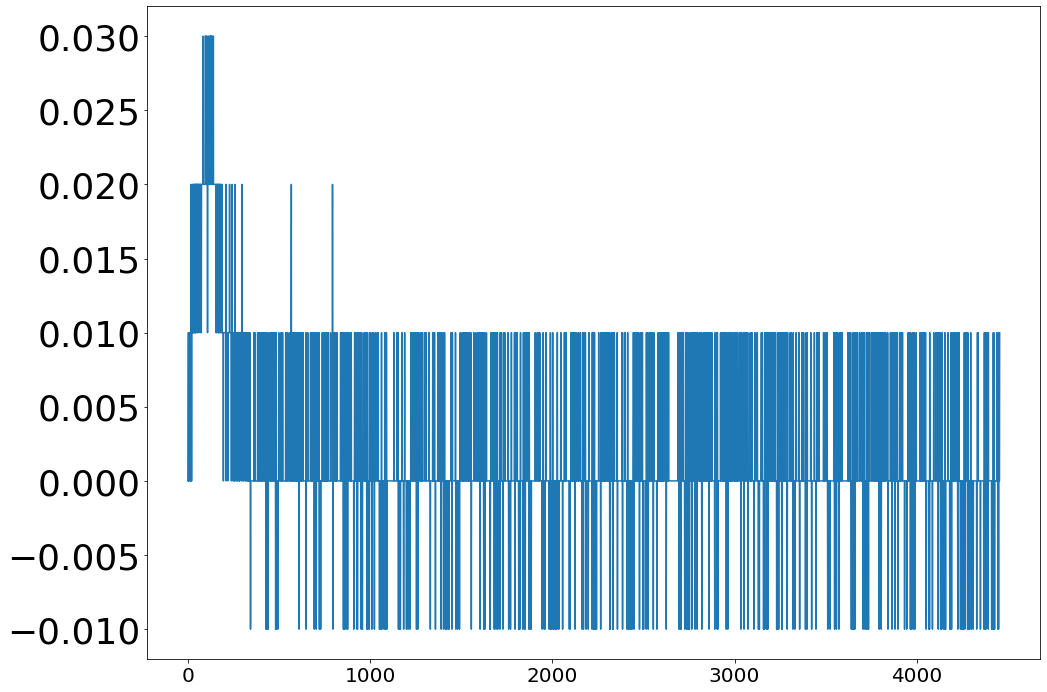

In [24]:
plt.plot(np.stack(shiftlist,axis=1)[0])